# Fourier Transforms

## Discrete Fourier Transforms
Given a set of sampled data you can apply the transform on the vector by multiplying it by matrices. 
This will give you a set of coefficients for each frequency in the data up to the nth frequency possible for n data points.

the nth frequency coefficient 
$$
\hat{f_k} = \sum_{j=0}^{n-1} f_je^{-i2\pi jk/n}
$$

To reconstruct the data from the coefficients
$$
f_k = \bigg(\sum_{j=0}^{n-1} \hat{f_j}e^{i2\pi jk/n}\bigg)\frac{1}{n}
$$

The DFT takes the sample as a vector and returns the coefficients as a vector. The data has to start with a zero index.
$$
\{f_0, f_1,f_2 ...f_n\} \implies \{\hat{f_0},\hat{f_1},\hat{f_2}...\hat{f_n}\}
$$

There is a fundamental frequency:
$$
\omega_n = e^{-i2\pi /n}
$$

This frequency can be used to form a DFT matrix. 
Given in complex numbers so that the magnitude and phase are communicated through the coeffs

## Fast Fourier Transforms

A technique for computing the DFT. An Algorithm. Clever and faster. 

Standard 

In [1]:
import numpy as np
import scipy as sci
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline 

In [2]:
pwd

'C:\\Users\\starlord\\Desktop\\Buoy Project'

In [3]:
df = pd.read_csv('fileName.csv')
df.head()

,t,Ax,Ay,Az,Bx,By,Bz,h
0,918.544769,80,NaN,NaN,NaN,NaN,NaN,NaN
1,935.499430,-6,0.0,16.0,24.0,-95.0,-98.0,179.78
2,951.465607,-5,-3.0,13.0,-6.0,-107.0,-101.0,180.04
3,968.421221,-4,-3.0,11.0,-42.0,-105.0,-100.0,180.48
4,981.428623,-3,-4.0,9.0,-83.0,-98.0,-101.0,180.30


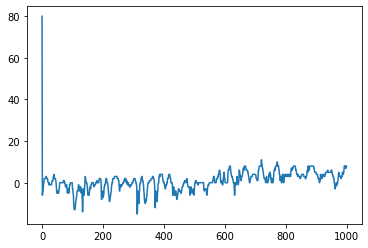

In [4]:
plt.plot(df.index,df['Ax'])

## Applying the FFT
The input it the time series. This converts everything into the frequency space. This example uses scipy but numpy also has an fft package.

In [5]:
from scipy import fftpack

In [6]:
axfft = fftpack.fft(df['Ax'])

In [17]:
type(df['Ax'])

pandas.core.series.Series

In [18]:
df['Ax'].head()

0    80
1    -6
2    -5
3    -4
4    -3
Name: Ax, dtype: int64

C:\Users\starlord\anaconda3\lib\site-packages\numpy\core\_asarray.py:85: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


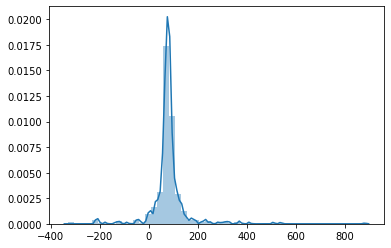

In [7]:
sns.distplot(axfft)

In [8]:
amplitude = np.abs(axfft)
power = amplitude**2
angle = np.angle(axfft)

The FFT returns a complex number.

In [9]:
axfft[0]

(883-0j)

To find the frequencies a time step is necessary.

In [10]:
time_step = df.index[1] - df.index[0] 

samplefreq = fftpack.fftfreq(df['Ax'].size,d=time_step)

In [11]:
amp_freq = np.array([amplitude, samplefreq])
print(amp_freq.shape)
print(amp_freq[:,0])

(2, 1000)
[883.   0.]


In [12]:
amp_position = amp_freq[0,:].argmax()
peak_freq = amp_freq[1,amp_position]
print(amp_position)
print(peak_freq)

1
0.001


### An Example of filtering out only the most prominent frequency 

In [13]:
denoise = axfft.copy()
denoise[np.abs(samplefreq) > peak_freq] = 0
filteredsig = fftpack.ifft(denoise)

In [14]:
filteredsig[0]

(1.9020541154440491+0j)

C:\Users\starlord\anaconda3\lib\site-packages\numpy\core\_asarray.py:85: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


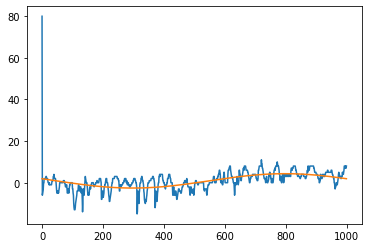

In [15]:
plt.figure()
plt.plot(df.index,df['Ax']) #sns does not handle imaginary numbers automatically
plt.plot(df.index,filteredsig)

**Note** This is actually a bad way of creating a filter: such brutal cut-off in frequency space does not control distorsion on the signal.

C:\Users\starlord\anaconda3\lib\site-packages\numpy\core\_asarray.py:85: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


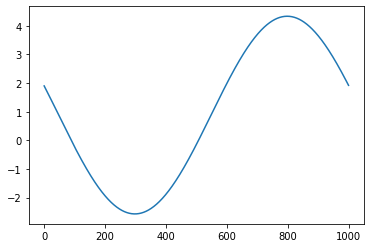

In [16]:
plt.plot(df.index,filteredsig)